In [77]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

## Data Quality Analysis and Pre-Processing

In [78]:
# Load dataset directly from the URL
url = "https://raw.githubusercontent.com/ArinB/MSBA-CA-03-Decision-Trees/master/census_data.csv"
df = pd.read_csv(url)

In [79]:
df.head()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0


In [80]:
#Printing the dataframe's shape
print(df.shape)

(48842, 11)


In [81]:
#Printing the dataframe's data types
data_types = pd.DataFrame(df.dtypes, columns=["Data Type"])
data_types

#Most of these are objects since the values are binned.
#Assigning the data types to a dataframe so we are able to add it to our data quality report

,Data Type
hours_per_week_bin,object
occupation_bin,object
msr_bin,object
capital_gl_bin,object
race_sex_bin,object
education_num_bin,object
education_bin,object
workclass_bin,object
age_bin,object
flag,object


In [82]:
#Check for missing values
missing_data = pd.DataFrame(df.isnull().sum())
missing_data

#As we can see, there are no missing values!
#Also assigning missing data to a dataframe so we can add to data quality report.

,0
hours_per_week_bin,0
occupation_bin,0
msr_bin,0
capital_gl_bin,0
race_sex_bin,0
education_num_bin,0
education_bin,0
workclass_bin,0
age_bin,0
flag,0


In [83]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(f"Counts for {column}:")
        print(df[column].value_counts())
        print()


Counts for hours_per_week_bin:
b. 31-40            26639
d. 41-50 & 61-70     9819
a. 0-30              7851
e. 51-60             3759
c. 71-100             774
Name: hours_per_week_bin, dtype: int64

Counts for occupation_bin:
c. Mid - Mid     13971
b. Mid - Low     12947
e. High          12258
a. Low            7237
d. Mid - High     2429
Name: occupation_bin, dtype: int64

Counts for msr_bin:
c. High    22047
b. Mid     15868
a. Low     10927
Name: msr_bin, dtype: int64

Counts for capital_gl_bin:
a. = 0    42525
c. > 0     4035
b. < 0     2282
Name: capital_gl_bin, dtype: int64

Counts for race_sex_bin:
c. High    29737
b. Mid     16457
a. Low      2648
Name: race_sex_bin, dtype: int64

Counts for education_num_bin:
b. 9-12    30324
c. 13       8025
a. 0-8      6408
d. 14       2657
e. 15+      1428
Name: education_num_bin, dtype: int64

Counts for education_bin:
b. Mid          30324
c. Bachelors     8025
a. Low           6408
d. Masters       2657
e. High          1428
Name: educ

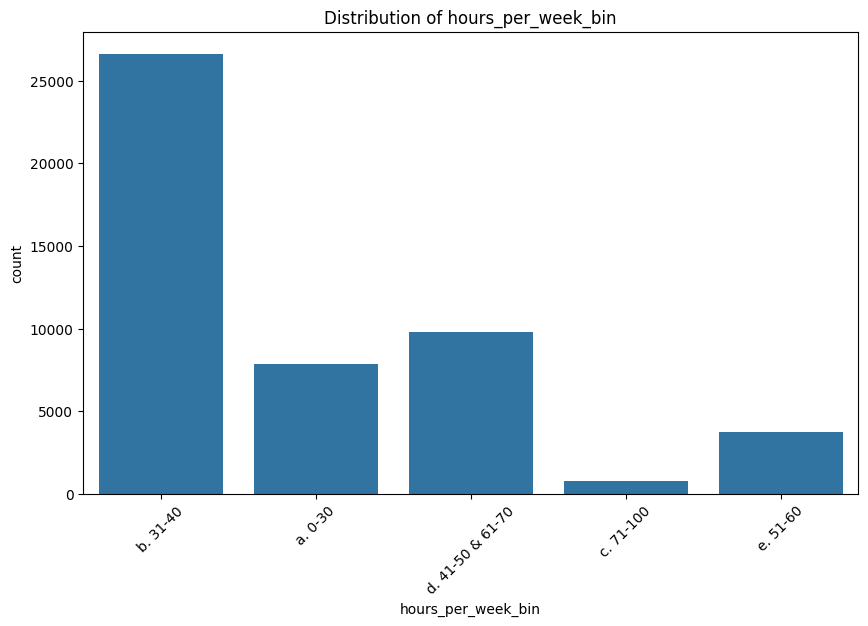

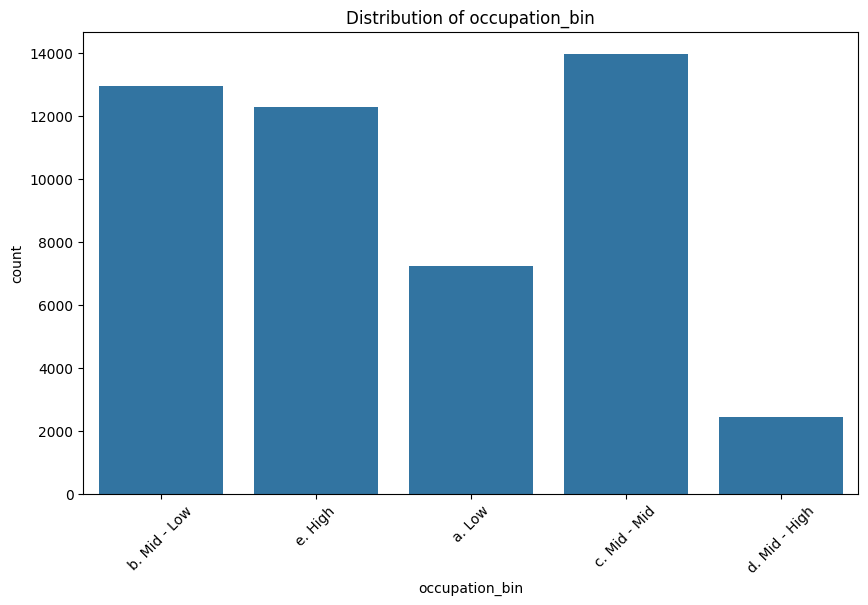

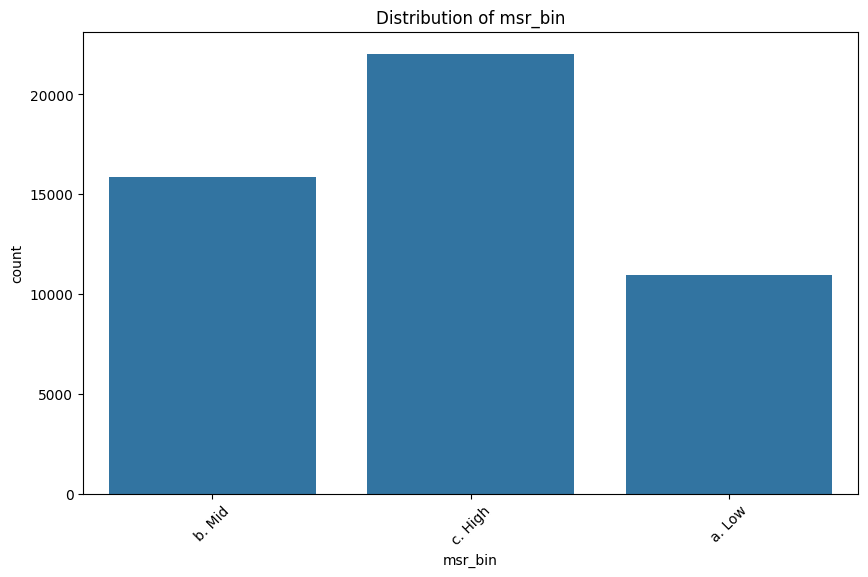

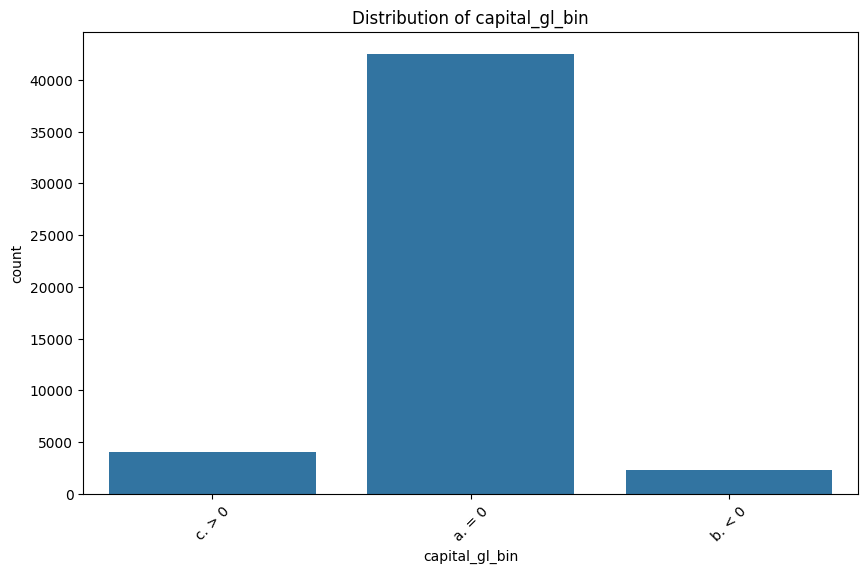

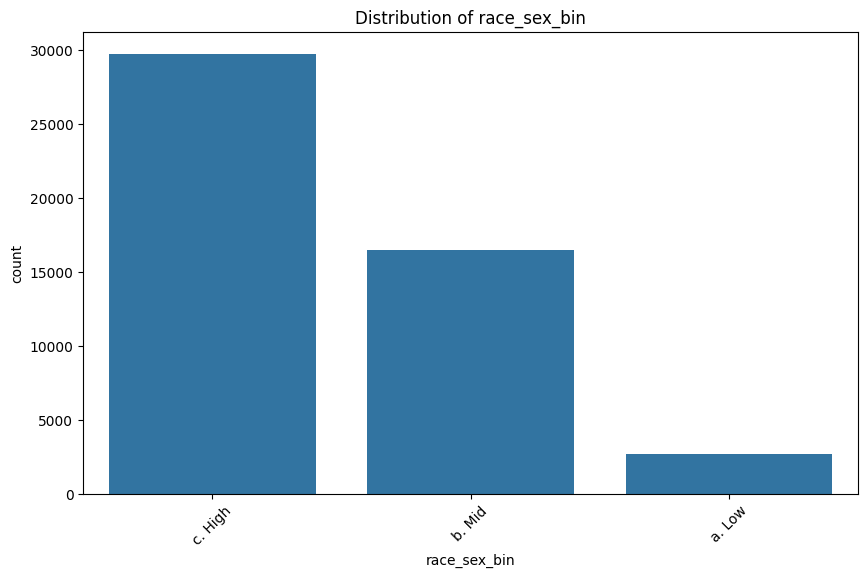

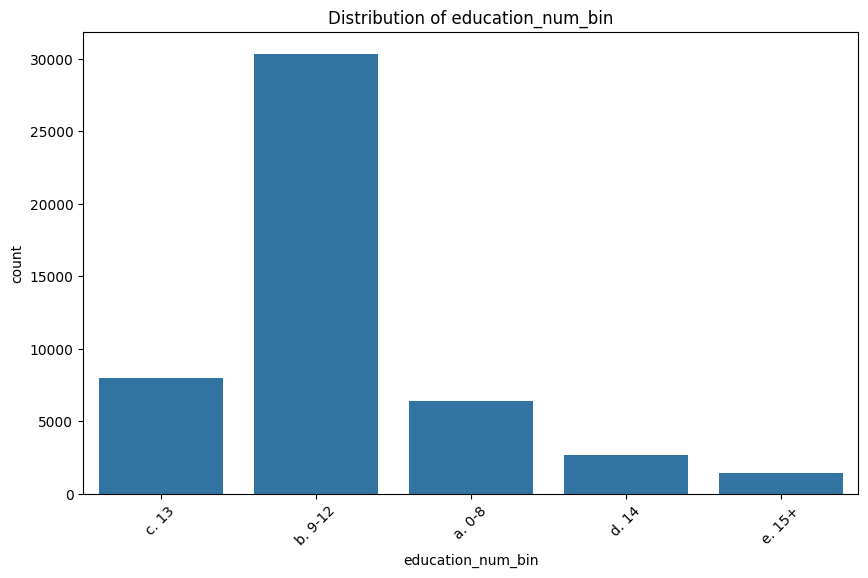

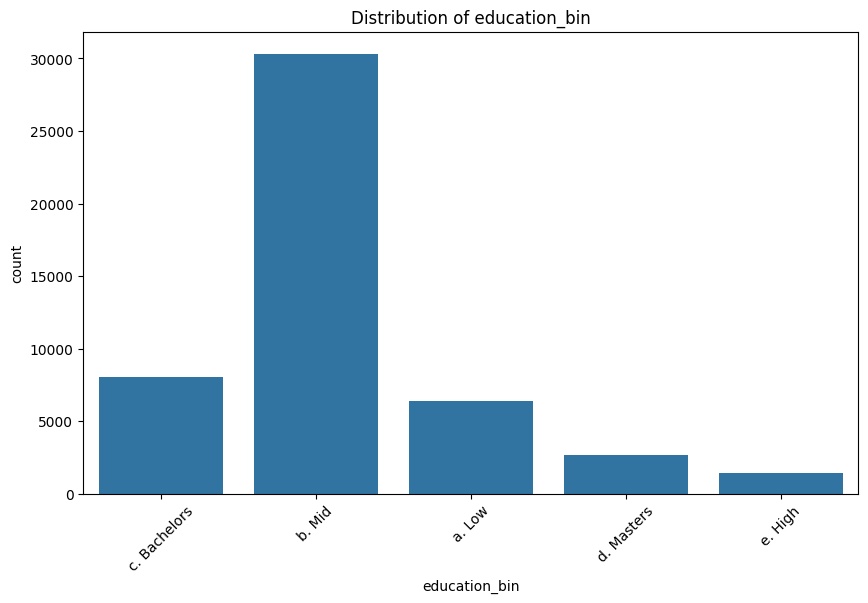

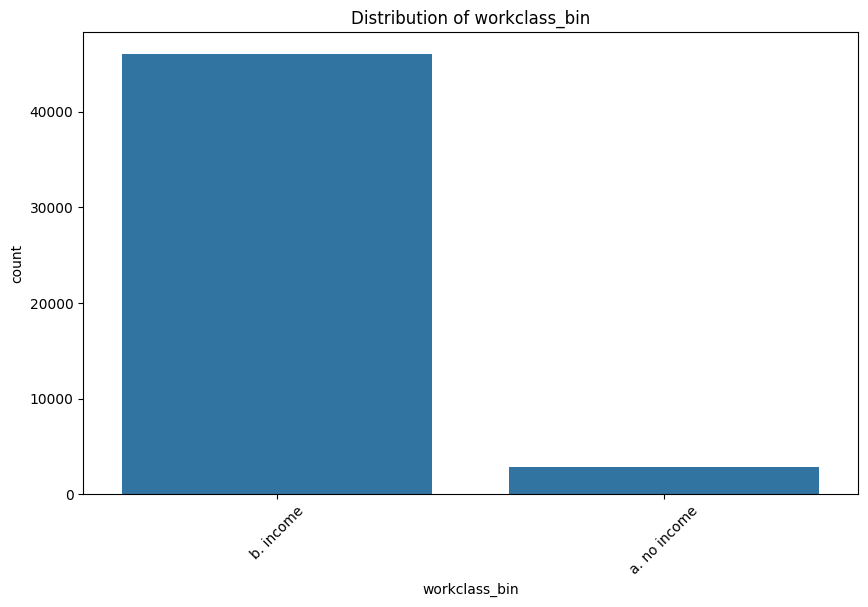

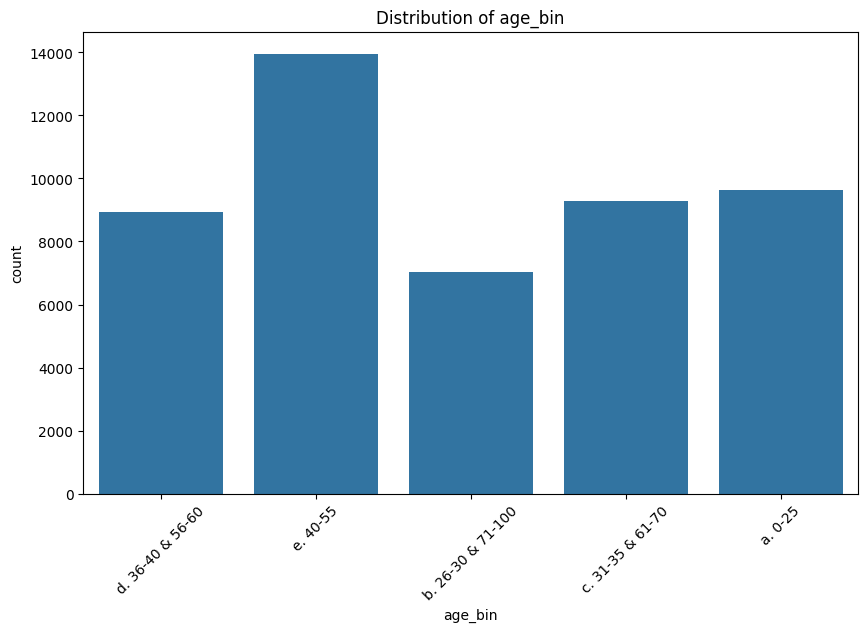

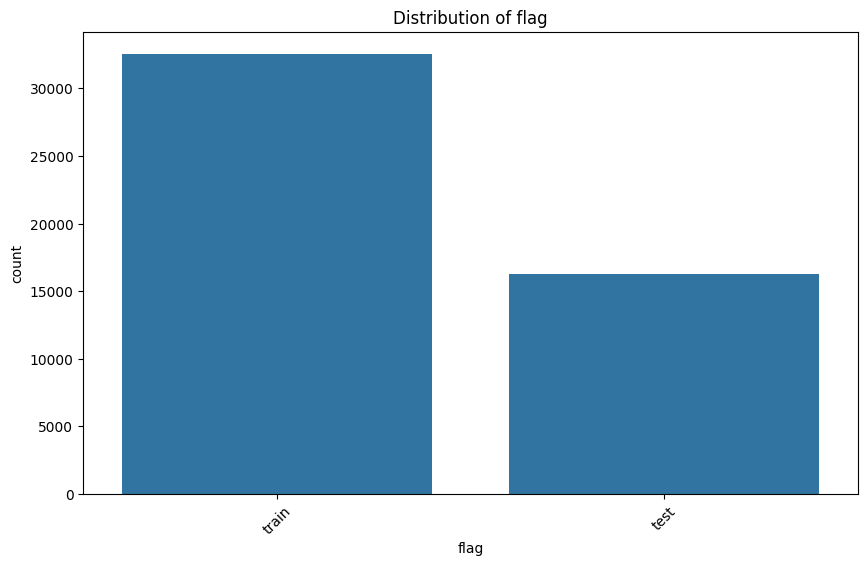

In [84]:
# Create a histogram for each categorical feature
for column in df.columns:
    if df[column].dtype == 'object':
        plt.figure(figsize=(10, 6))
        sns.countplot(x=column, data=df)
        plt.title(f"Distribution of {column}")
        plt.xticks(rotation=45)
        plt.show()

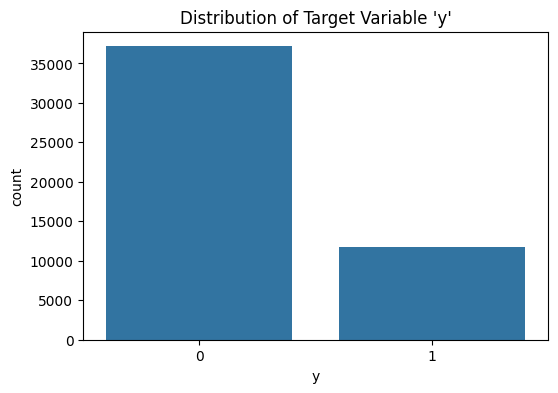

In [85]:
# Plot the distribution of the target variable 'y'
plt.figure(figsize=(6, 4))
sns.countplot(x='y', data=df)
plt.title("Distribution of Target Variable 'y'")
plt.show()

## Creating Data Quality Report ##

In [86]:
#1 Check for unique values
unique_values = pd.DataFrame(columns=["Unique Values"])
for row in list(df.columns.values):
    unique_values.loc[row] = [df[row].nunique()]
unique_values

,Unique Values
hours_per_week_bin,5
occupation_bin,5
msr_bin,3
capital_gl_bin,3
race_sex_bin,3
education_num_bin,5
education_bin,5
workclass_bin,2
age_bin,5
flag,2


In [87]:
#2 Generate summary statistics for numerical column
sum_stats_num = df.describe().transpose()
sum_stats_num

#Note that the y column is the only numerical column, but it is also

,count,mean,std,min,25%,50%,75%,max
y,48842.0,0.239282,0.426649,0.0,0.0,0.0,0.0,1.0


In [88]:
# Descriptive statistics for categorical columns
descriptive_stats = df.describe(include='object').transpose()
descriptive_stats

,count,unique,top,freq
hours_per_week_bin,48842,5,b. 31-40,26639
occupation_bin,48842,5,c. Mid - Mid,13971
msr_bin,48842,3,c. High,22047
capital_gl_bin,48842,3,a. = 0,42525
race_sex_bin,48842,3,c. High,29737
education_num_bin,48842,5,b. 9-12,30324
education_bin,48842,5,b. Mid,30324
workclass_bin,48842,2,b. income,46012
age_bin,48842,5,e. 40-55,13963
flag,48842,2,train,32561


In [89]:
# Data Quality Report
data_quality_report = pd.concat([missing_data, descriptive_stats], axis=1)
data_quality_report.columns = ['Missing Values', 'Count', 'Unique Values', 'Top', 'Frequency']
data_quality_report

,Missing Values,Count,Unique Values,Top,Frequency
hours_per_week_bin,0,48842,5,b. 31-40,26639
occupation_bin,0,48842,5,c. Mid - Mid,13971
msr_bin,0,48842,3,c. High,22047
capital_gl_bin,0,48842,3,a. = 0,42525
race_sex_bin,0,48842,3,c. High,29737
education_num_bin,0,48842,5,b. 9-12,30324
education_bin,0,48842,5,b. Mid,30324
workclass_bin,0,48842,2,b. income,46012
age_bin,0,48842,5,e. 40-55,13963
flag,0,48842,2,train,32561


## Decision Tree Classifier Model

In [90]:
# Split the data based on the 'flag' column
train_data = df[df['flag'] == 'train']
test_data = df[df['flag'] == 'test']

In [91]:
# filter data to get accurate predetermined train test `variables
train_data_filtered = train_data[train_data['flag'] == 'train']

In [92]:
# Split the filtered training data into features and labels
X_train = train_data_filtered.drop(['flag', 'y'], axis=1)
y_train = train_data_filtered['y']

X_test = test_data[test_data['flag'] == 'test'].drop(['flag', 'y'], axis=1)
y_test = test_data[test_data['flag'] == 'test']['y']

In [93]:
# Encoding categorical variables in the training and test sets
label_encoder = LabelEncoder()
for column in X_train.columns:
    if X_train[column].dtype == 'object':
        # Fit the encoder on the training data
        label_encoder.fit(X_train[column])
        # Transform both training and test data
        X_train[column] = label_encoder.transform(X_train[column])
        X_test[column] = label_encoder.transform(X_test[column])

In [94]:
# Fit a decision tree
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=3,random_state=101,max_features=None, min_samples_leaf=15)
dtree.fit(X_train, y_train)
y_pred=dtree.predict(X_test)

In [98]:
# Check for the sklearn version
import sklearn
print(sklearn.__version__)

1.2.2


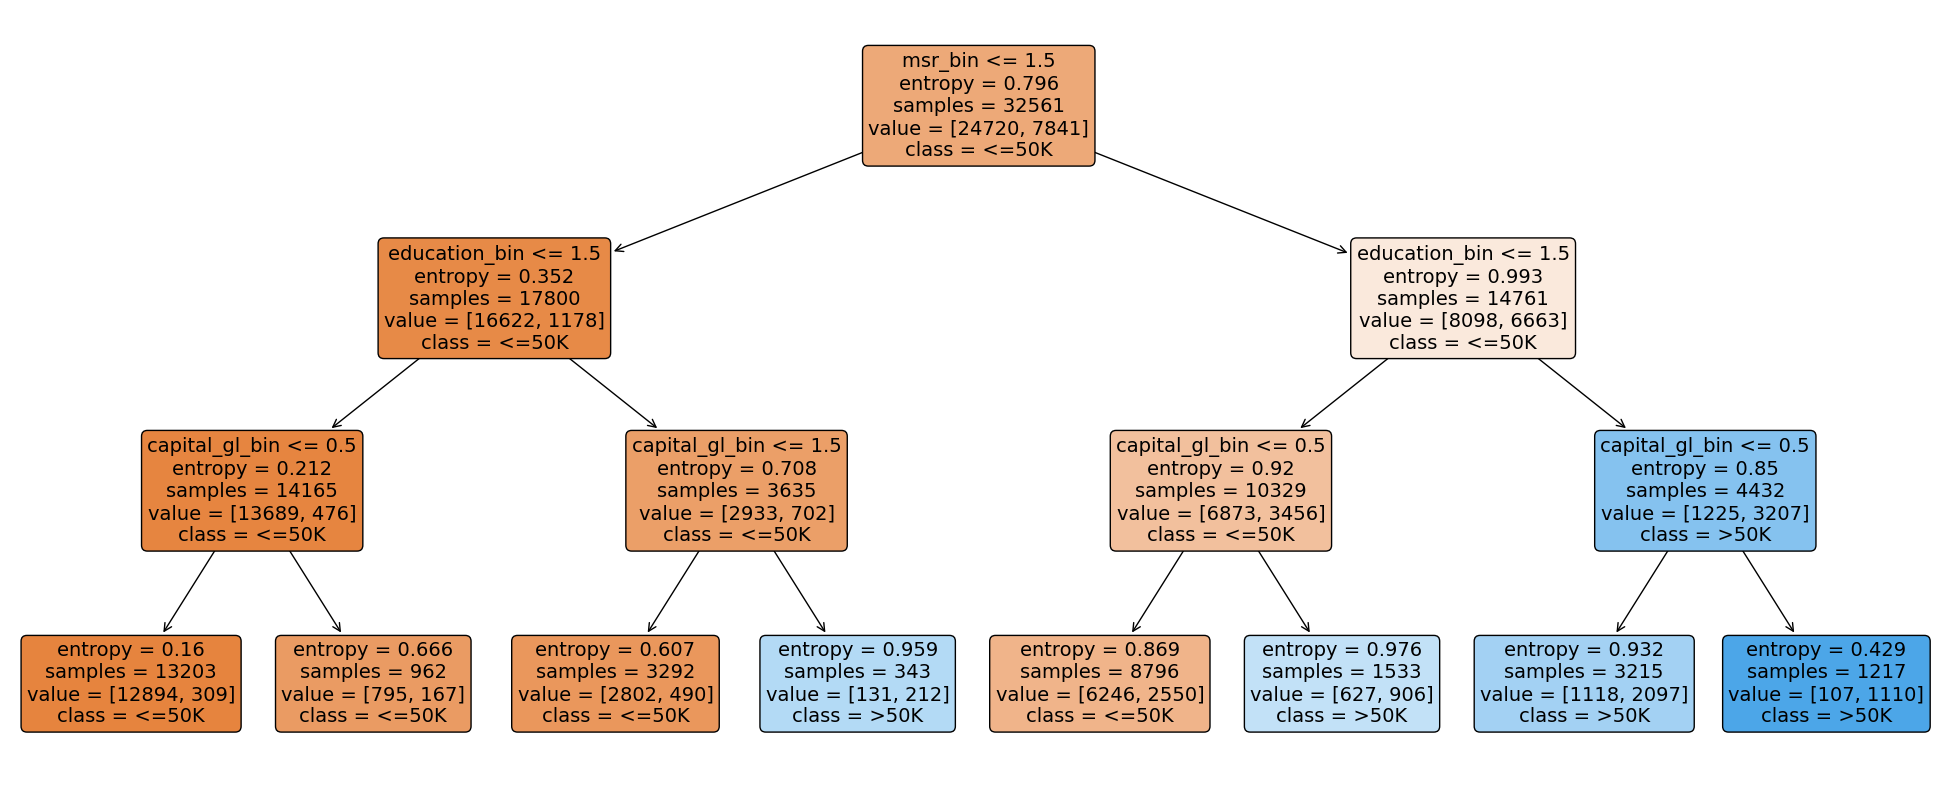

In [97]:
plt.figure(figsize=(25, 10))
a = plot_tree(dtree, feature_names=list(X_train), class_names=['<=50K', '>50K'],
              filled=True, rounded=True, fontsize=14)

## Decision Tree Model Evaluation

In [ ]:
# Check Performance
# Printing classifier report after prediction
y_predicted = dtree.predict(X_test)  # Make sure to use your model and test data here
print(classification_report(y_test, y_predicted, target_names=['<=50K', '>50K']))

              precision    recall  f1-score   support

       <=50K       0.87      0.92      0.89     12435
        >50K       0.68      0.55      0.61      3846

    accuracy                           0.83     16281
   macro avg       0.78      0.73      0.75     16281
weighted avg       0.82      0.83      0.83     16281



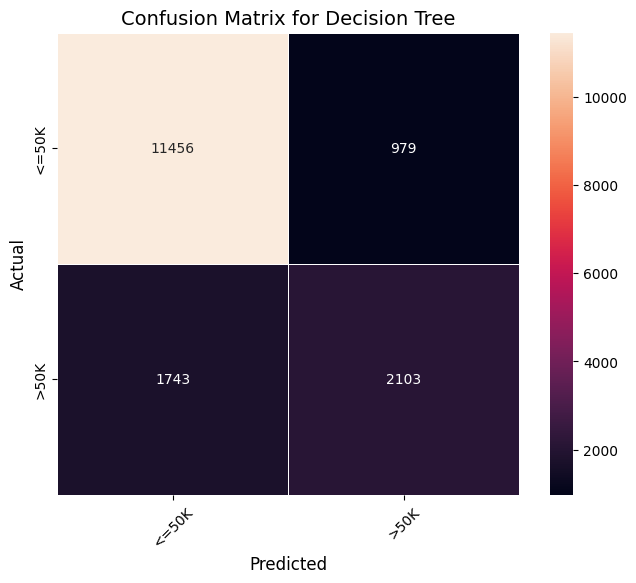

In [ ]:
# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Set up the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, square=True, ax=ax)

# Set labels and title
ax.set_xlabel("Predicted", fontsize=12)
ax.set_ylabel("Actual", fontsize=12)
ax.set_title("Confusion Matrix for Decision Tree", fontsize=14)

# Set tick labels for x-axis and y-axis
ax.xaxis.set_ticklabels(['<=50K', '>50K'])
ax.yaxis.set_ticklabels(['<=50K', '>50K'])

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


# Tune Decision Tree Performance

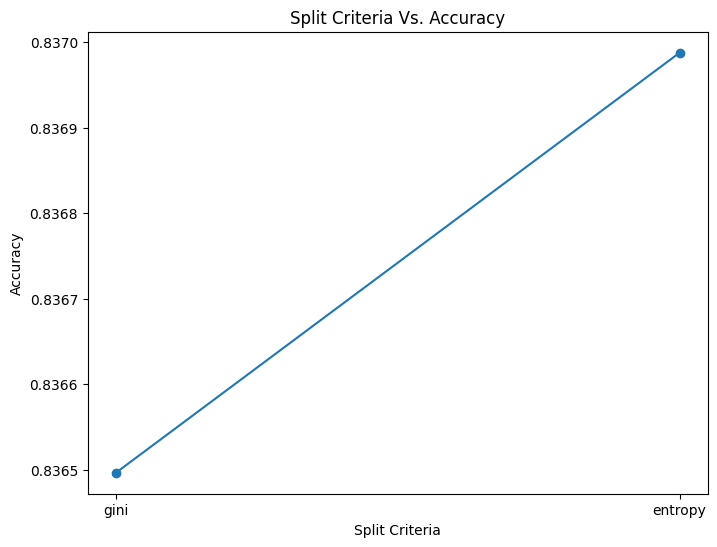

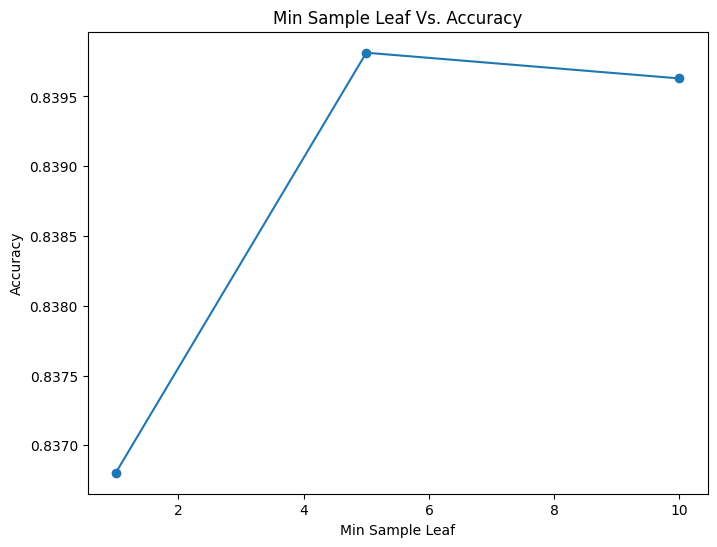

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


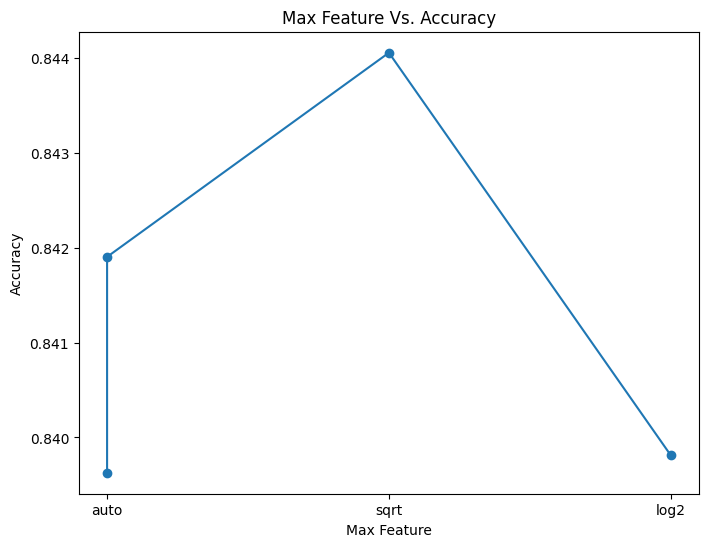

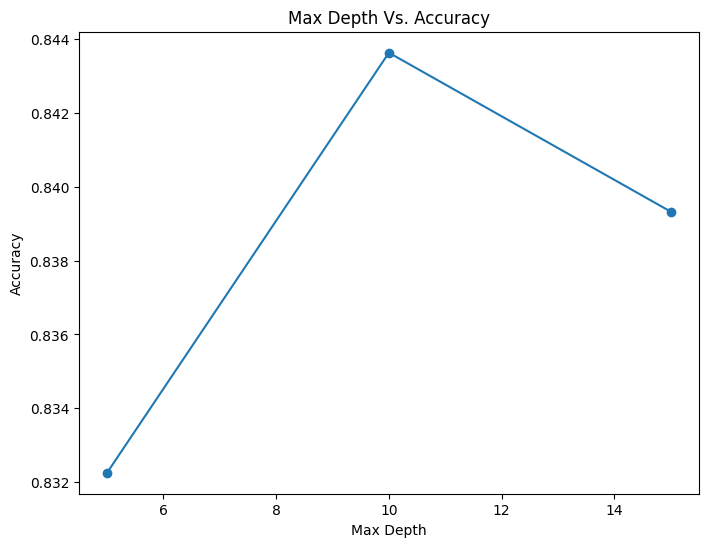

    Run Split Criteria  Accuracy  Min Sample Leaf Max Feature  Max Depth
0     1           gini  0.836497              NaN         NaN        NaN
1     1        entropy  0.836988              NaN         NaN        NaN
2     2        entropy  0.836804              1.0         NaN        NaN
3     2        entropy  0.839813              5.0         NaN        NaN
4     2        entropy  0.839629             10.0         NaN        NaN
5     3        entropy  0.839629             10.0        None        NaN
6     3        entropy  0.841902             10.0        auto        NaN
7     3        entropy  0.844051             10.0        sqrt        NaN
8     3        entropy  0.839813             10.0        log2        NaN
9     4        entropy  0.842516             10.0        log2        NaN
10    4        entropy  0.832258             10.0        log2        5.0
11    4        entropy  0.843621             10.0        log2       10.0
12    4        entropy  0.839322             10.0  

In [ ]:
import matplotlib.pyplot as plt

# Define the values to test for each hyperparameter
split_criteria_values = ['gini', 'entropy']
min_sample_leaf_values = [1, 5, 10]
max_feature_values = [None, 'auto', 'sqrt', 'log2']
max_depth_values = [None, 5, 10, 15]


# Function to train and test the model for a specific hyperparameter
def train_test_model(criterion, min_sample_leaf=1, max_feature=None, max_depth=None):
    model = DecisionTreeClassifier(criterion=criterion, min_samples_leaf=min_sample_leaf,
                                   max_features=max_feature, max_depth=max_depth)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Initialize variables to store best hyperparameter values
best_split_criteria = None
best_min_sample_leaf = None
best_max_feature = None
best_max_depth = None

# Initialize an empty list to store DataFrames for each run
dfs = []

# Loop through each run
for run in range(1, 5):
    if run == 1:
        # Run 1: Vary Split Criteria
        accuracies = []
        for split_criteria in split_criteria_values:
            accuracy = train_test_model(criterion=split_criteria)
            accuracies.append(accuracy)

            # Append results to a temporary DataFrame
            temp_df = pd.DataFrame({'Run': [run],
                                    'Split Criteria': [split_criteria],
                                    'Accuracy': [accuracy]})
            dfs.append(temp_df)

        # Plot the graph for Split Criteria Vs. Accuracy
        plt.figure(figsize=(8, 6))
        plt.plot(split_criteria_values, accuracies, marker='o')
        plt.title('Split Criteria Vs. Accuracy')
        plt.xlabel('Split Criteria')
        plt.ylabel('Accuracy')
        plt.show()

        # Find the best Split Criteria
        best_split_criteria = dfs[-1].loc[dfs[-1]['Accuracy'].idxmax()]['Split Criteria']

    elif run == 2:
        # Run 2: Use best Split Criteria, vary Min Sample Leaf
        accuracies = []
        for min_sample_leaf in min_sample_leaf_values:
            accuracy = train_test_model(criterion=best_split_criteria, min_sample_leaf=min_sample_leaf)
            accuracies.append(accuracy)

            # Append results to a temporary DataFrame
            temp_df = pd.DataFrame({'Run': [run],
                                    'Split Criteria': [best_split_criteria],
                                    'Min Sample Leaf': [min_sample_leaf],
                                    'Accuracy': [accuracy]})
            dfs.append(temp_df)

        # Plot the graph for Min Sample Leaf Vs. Accuracy
        plt.figure(figsize=(8, 6))
        plt.plot(min_sample_leaf_values, accuracies, marker='o')
        plt.title('Min Sample Leaf Vs. Accuracy')
        plt.xlabel('Min Sample Leaf')
        plt.ylabel('Accuracy')
        plt.show()

        # Find the best Min Sample Leaf
        best_min_sample_leaf = dfs[-1].loc[dfs[-1]['Accuracy'].idxmax()]['Min Sample Leaf']

    elif run == 3:
        # Run 3: Use best Split Criteria and Min Sample Leaf, vary Max Feature
        accuracies = []
        for max_feature in max_feature_values:
            accuracy = train_test_model(criterion=best_split_criteria, min_sample_leaf=best_min_sample_leaf,
                                        max_feature=max_feature)
            accuracies.append(accuracy)

            # Append results to a temporary DataFrame
            temp_df = pd.DataFrame({'Run': [run],
                                    'Split Criteria': [best_split_criteria],
                                    'Min Sample Leaf': [best_min_sample_leaf],
                                    'Max Feature': [max_feature],
                                    'Accuracy': [accuracy]})
            dfs.append(temp_df)

        # Plot the graph for Max Feature Vs. Accuracy
        plt.figure(figsize=(8, 6))
        # Replace None with 'auto' for plotting
        max_feature_values_for_plotting = ['auto' if val is None else val for val in max_feature_values]
        plt.plot(max_feature_values_for_plotting, accuracies, marker='o')
        plt.title('Max Feature Vs. Accuracy')
        plt.xlabel('Max Feature')
        plt.ylabel('Accuracy')
        plt.show()

        # Find the best Max Feature
        best_max_feature = dfs[-1].loc[dfs[-1]['Accuracy'].idxmax()]['Max Feature']

    elif run == 4:
        # Run 4: Use best Split Criteria, Min Sample Leaf, and Max Feature, vary Max Depth
        accuracies = []
        for max_depth in max_depth_values:
            accuracy = train_test_model(criterion=best_split_criteria, min_sample_leaf=best_min_sample_leaf,
                                        max_feature=best_max_feature, max_depth=max_depth)
            accuracies.append(accuracy)

            # Append results to a temporary DataFrame
            temp_df = pd.DataFrame({'Run': [run],
                                    'Split Criteria': [best_split_criteria],
                                    'Min Sample Leaf': [best_min_sample_leaf],
                                    'Max Feature': [best_max_feature],
                                    'Max Depth': [max_depth],
                                    'Accuracy': [accuracy]})
            dfs.append(temp_df)

        # Plot the graph for Max Depth Vs. Accuracy
        plt.figure(figsize=(8, 6))
        plt.plot(max_depth_values, accuracies, marker='o')
        plt.title('Max Depth Vs. Accuracy')
        plt.xlabel('Max Depth')
        plt.ylabel('Accuracy')
        plt.show()

        # Find the best Max Depth
        best_max_depth = dfs[-1].loc[dfs[-1]['Accuracy'].idxmax()]['Max Depth']

# Concatenate all temporary DataFrames into the final results DataFrame
results_df = pd.concat(dfs, ignore_index=True)

# Display the final results DataFrame
print(results_df)

In [ ]:
# prompt: give me print statements to calculate model run time
import time

start_time = time.time()
dtree.fit(X_train, y_train)
end_time = time.time()
print(f"Model run time: {end_time - start_time:.2f} seconds")


Model run time: 0.02 seconds


Model train time: 0.02 seconds


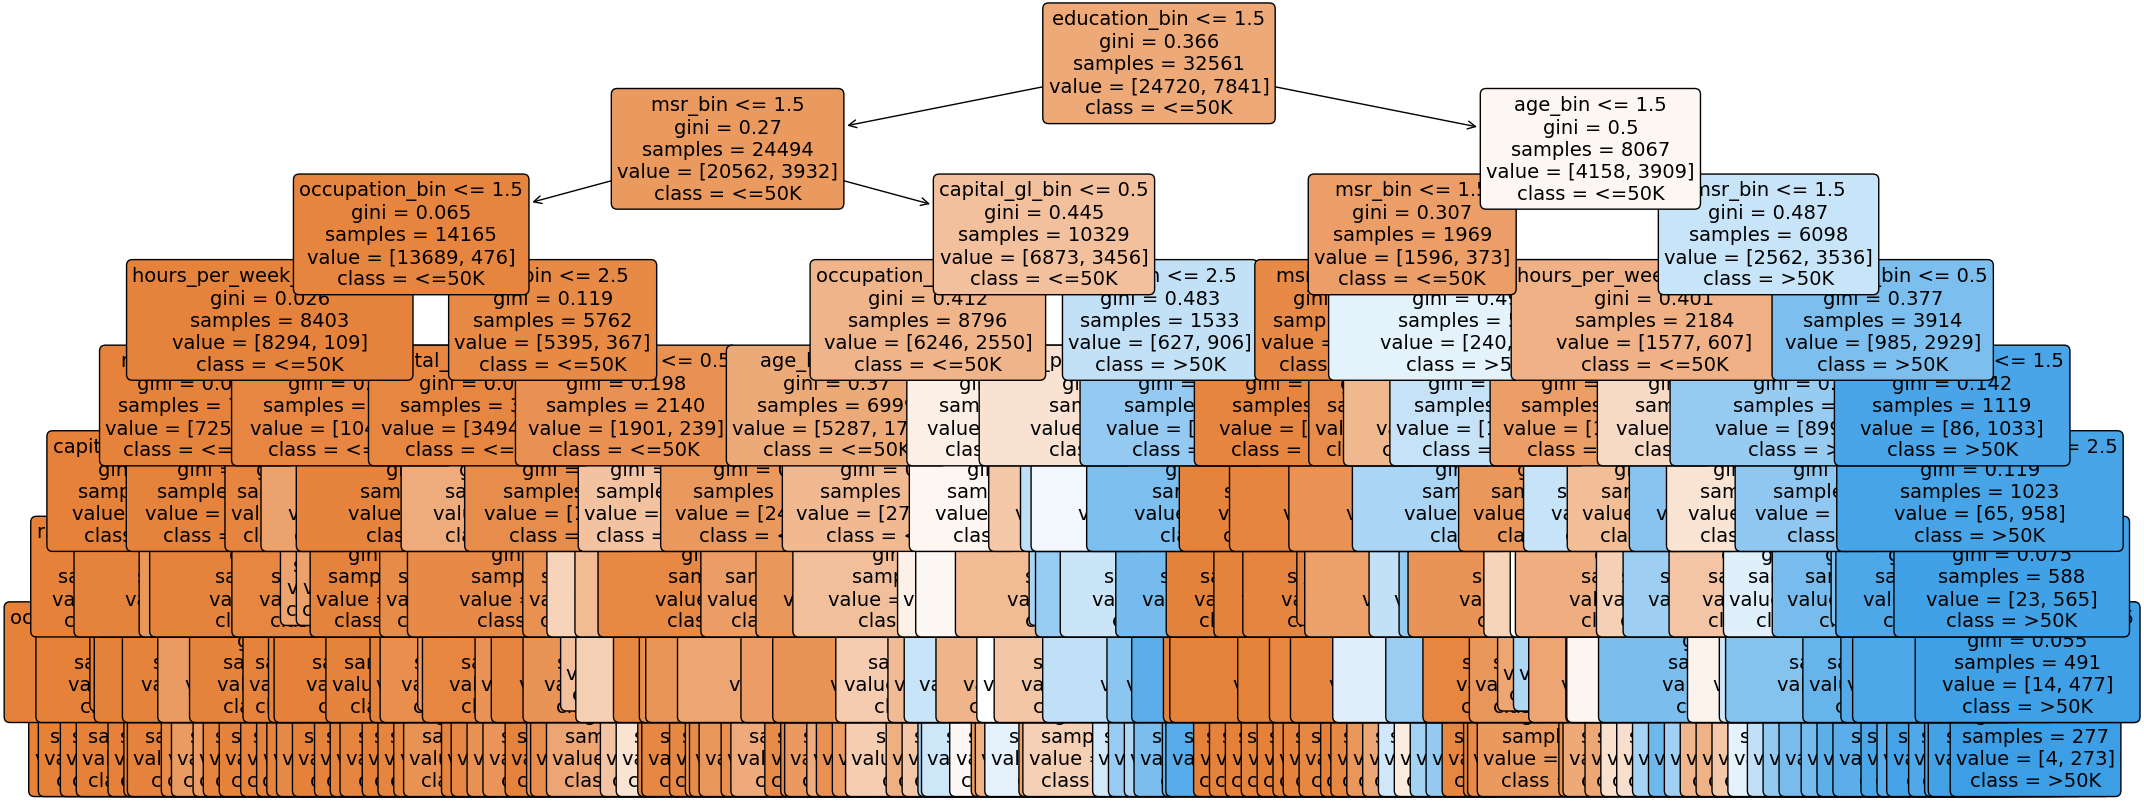

In [ ]:
# Create a new DecisionTreeClassifier object
model = DecisionTreeClassifier(criterion='gini', max_depth=8,max_features=0.6, min_samples_leaf=30, random_state=42)

# Fit the model to the training data
start_time = time.time()
model.fit(X_train, y_train)
end_time = time.time()
print(f"Model train time: {end_time - start_time:.2f} seconds")

# Visualize the decision tree
plt.figure(figsize=(25, 10))
a = plot_tree(model, feature_names=list(X_train), class_names=['<=50K', '>50K'],
              filled=True, rounded=True, fontsize=14)
plt.show()


In [ ]:
# Input data
input_data = {
    'hours_per_week_bin': 48,
    'occupation_bin': 'Mid - Low',
    'msr_bin': 'High',
    'capital_gl_bin': 'Yes',
    'race_sex_bin': 'Mid',
    'education_num_bin': 12,
    'education_bin': 'High',
    'workclass_bin': 'Income',
    'age_bin': 58
}

# Label encoding for categorical variables
label_encoder = LabelEncoder()
input_data_encoded = {key: label_encoder.fit_transform([value])[0] if isinstance(value, str) else value for key, value in input_data.items()}

# Prepare input for prediction
X = [[input_data_encoded[key] for key in input_data_encoded]]

# Make prediction
prediction = model.predict(X)

# The 'prediction' variable now contains the predicted class for the given input
print("Predicted class:", prediction)

Predicted class: [0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# Get the prediction probabilities
prediction_probabilities = model.predict_proba(X)

# Extract the probability for the predicted class
predicted_class_probability = prediction_probabilities[0][prediction[0]]

# Print the probability score
print("Probability score:", predicted_class_probability)


Probability score: 0.9669421487603306


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Answers to questions

1. Decision trees often perform better when features are in intervals because
their ability to capture non-linear relationships is enhanced. Discretization also helps
minimize the impact of outliers by categorizing extreme values into bins.

2. The outliers could greater influence the model if they were not binned. This would decrease
the model's accuracy and quality.

3. The best parameters we found were criterion='gini', max_depth=8,max_features=0.6, min_samples_leaf=30.

4. Not very long at all. 0.05 seconds

5. Yes I believe we found the best tree. We choose the highest accuracy scores based on the graphical
visualizationa of hyperparameter changes versus accuracy.

6. I'm quite surprised by how complex and massive the tree is. You are unable to even see most of the
classifier's descriptions after the 4th level.

7. Yes it probably will overfit given by how grown it is and how many nodes there are at the bottom.

8. The probability is 0.9669421487603306